<hr>
Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)<br>
<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" \><br><br>
<hr>

Updated: 2019/11/13

#### Load the ferret extension

In [1]:
%load_ext ferretmagic

#### Get data from ferret and put data from python

! Enter_GO land
! Exit_GO


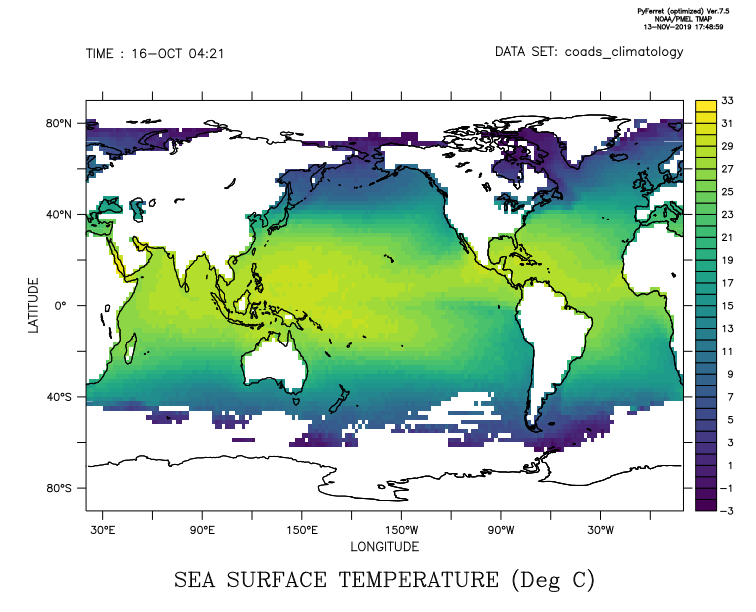

In [2]:
%%ferret
set text/font=hershey
use coads_climatology
shade sst[l=10] ; go land

In [3]:
%ferret_getdata sstdict = sst

Message: sstdict is now available in python as a dictionary containing the variable's metadata and data array.

In [4]:
sstdict.keys()

dict_keys(['title', 'data', 'missing_value', 'data_unit', 'axis_types', 'axis_names', 'axis_units', 'axis_coords'])

In [5]:
sstdata = sstdict['data']
type(sstdata)

numpy.ndarray

In [6]:
import numpy
mask = numpy.abs(sstdata - sstdict['missing_value']) < 1.0E-5
sstdata[mask] = -10.0
sstdict['name'] = 'SSTCopy'
sstdict['title'] = 'SST with miss vals set to -10'
sstdict.keys()

dict_keys(['title', 'data', 'missing_value', 'data_unit', 'axis_types', 'axis_names', 'axis_units', 'axis_coords', 'name'])

In [7]:
%ferret_putdata sstdict

Message: sstdict is now available in ferret as SSTCopy

currently SET data sets:
 1> /opt/ferret_dsets/data/coads_climatology.cdf (default)
 name title I J K L
 SST SEA SURFACE TEMPERATURE 1:180 1:90 ... 1:12
 AIRT AIR TEMPERATURE 1:180 1:90 ... 1:12
 SPEH SPECIFIC HUMIDITY 1:180 1:90 ... 1:12
 WSPD WIND SPEED 1:180 1:90 ... 1:12
 UWND ZONAL WIND 1:180 1:90 ... 1:12
 VWND MERIDIONAL WIND 1:180 1:90 ... 1:12
 SLP SEA LEVEL PRESSURE 1:180 1:90 ... 1:12
 ------ Python Variables ------
 SSTCOPY SST with miss vals set to -10 1:180 1:90 ... 1:12 ... ...


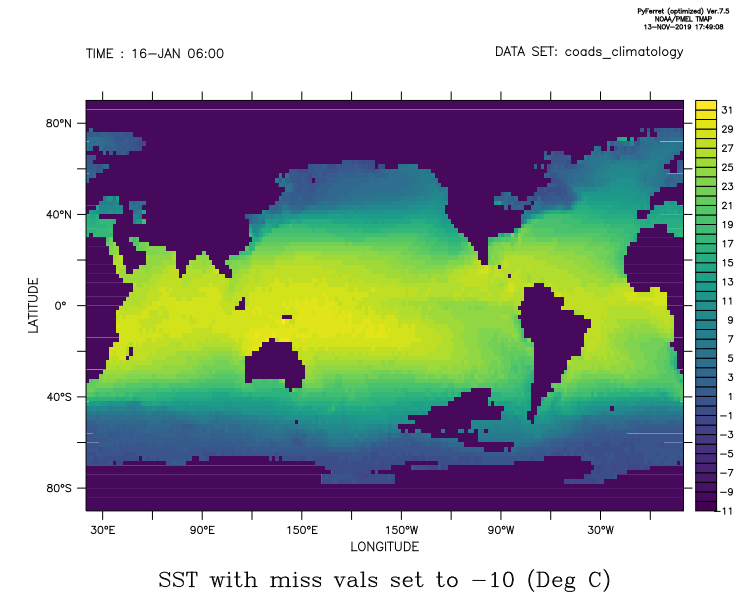

In [8]:
%%ferret
show data
shade sstcopy[l=1]